# Séance 4: Cas JV AMEX

## Table de matières 
* [01. Importation de packages](#packages)
* [02. Importaion du fichier](#fichier)
* [03. Analyses préliminaires BD JV AMEX](#exploration)
* [04. Clustering](#cluster)

<a id='packages'></a>

## 01. Importation de packages 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from scipy.stats import pearsonr
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

<a id='fichier'></a>
## 02. Importation du fichier 

In [2]:
# Importation de données
df = pd.read_csv("./chiboub-Données_cas_JV_AMEX.csv", sep=";")

In [3]:
df.head()

,ID,Dernier_achat_jours,Freq_achats,Vlr_mon_annuelle,HA_cosmetiques,HA_Bijoux,_HA_SAQ_Selection,Impressions Publisac,HA_WINNERS,HA_Diesel,HA_Horstaxes,Pourc_HA_SOLDES
0,102203,174,4,151,17,26,36,42,60,1627,123,0
1,106024,174,3,31,1,0,48,44,69,1554,95,29
2,108442,314,2,170,62,260,172,0,65,1678,85,29
3,108559,98,3,40,11,21,42,26,903,75,289,20
4,109747,153,5,89,37,161,196,0,60,1507,90,0


In [4]:
df.sort_values(by="ID", ascending=True)
df.head(10)

,ID,Dernier_achat_jours,Freq_achats,Vlr_mon_annuelle,HA_cosmetiques,HA_Bijoux,_HA_SAQ_Selection,Impressions Publisac,HA_WINNERS,HA_Diesel,HA_Horstaxes,Pourc_HA_SOLDES
0,102203,174,4,151,17,26,36,42,60,1627,123,0
1,106024,174,3,31,1,0,48,44,69,1554,95,29
2,108442,314,2,170,62,260,172,0,65,1678,85,29
3,108559,98,3,40,11,21,42,26,903,75,289,20
4,109747,153,5,89,37,161,196,0,60,1507,90,0
5,112078,33,4,0,0,0,49,43,39,1568,113,0
6,112889,347,3,227,39,112,63,26,60,1537,143,37
7,117132,99,3,59,18,111,176,0,24,1627,94,37
8,125255,66,5,180,17,53,37,46,73,1592,66,0
9,126782,94,4,111,12,52,64,19,894,7,305,38


<a id='exploration'></a>
## 03. Analyses préliminaires

In [5]:
# from IPython.display import HTML, display, Markdown
# display(HTML("""<style>div#notebook-container {width:90%;}</style>"""))
# Configuration pour afficher tous les résultats
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

### 03.1 Informations générales

In [6]:
print("1. Information générales")
print("-" * 40)
print(f"Nombre total de clients : {len(df)}")
print(f"Nombre de colonnes : {len(df.columns)}")
print(f"Total annuelle: {df.Vlr_mon_annuelle.sum()}")
print("\nTypes de colonnes :")
print(df.dtypes)

1. Information générales
----------------------------------------
Nombre total de clients : 334
Nombre de colonnes : 12
Total annuelle: 53363

Types de colonnes :
ID                      int64
Dernier_achat_jours     int64
Freq_achats             int64
Vlr_mon_annuelle        int64
HA_cosmetiques          int64
HA_Bijoux               int64
_HA_SAQ_Selection       int64
Impressions Publisac    int64
HA_WINNERS              int64
HA_Diesel               int64
HA_Horstaxes            int64
Pourc_HA_SOLDES         int64
dtype: object


### 03.2 Stats descriptives

In [7]:
print("\n2. Statistiques descriptives")
print("-" * 40)
# Sélectionner uniquement les colonnes numériques
colonnes_numeriques = df.select_dtypes(include=[np.number]).columns
statistiques_descriptives = df[colonnes_numeriques].describe().T
print(statistiques_descriptives)


2. Statistiques descriptives
----------------------------------------
                      count           mean            std       min        25%       50%        75%       max
ID                    334.0  526820.856287  263318.079573  102203.0  300679.75  509265.0  772592.25  999932.0
Dernier_achat_jours   334.0     181.344311     108.482232       1.0      85.75     175.0     277.75     365.0
Freq_achats           334.0       2.988024       1.004423       0.0       2.00       3.0       4.00       6.0
Vlr_mon_annuelle      334.0     159.769461      98.646383       0.0      88.00     152.0     230.75     508.0
HA_cosmetiques        334.0      33.275449      29.889821       0.0      11.00      24.5      48.00     135.0
HA_Bijoux             334.0     171.458084     157.466684       0.0      57.75     124.0     236.75     778.0
_HA_SAQ_Selection     334.0     114.781437      69.936287       5.0      45.00     118.5     182.75     220.0
Impressions Publisac  334.0      20.134731      2

### 03.3 Analyses divers

In [8]:
# Analyse des Achats
print("\n3. ANALYSE DES ACHATS")
print("-" * 40)
print("Statistiques des Fréquences d'Achats :")
print(df["Freq_achats"].value_counts())

print("\nMoyenne des Valeurs Monétaires Annuelles :")
print(f"{df['Vlr_mon_annuelle'].mean():.2f} $")

# Distribution des Achats par Catégorie
print("\n4. DISTRIBUTION DES ACHATS PAR CATÉGORIE")
print("-" * 40)
categories_achats = [
    "HA_cosmetiques",
    "HA_Bijoux",
    "_HA_SAQ_Selection",
    "HA_WINNERS",
    "HA_Diesel",
]

for categorie in categories_achats:
    print(f"\nAnalyse de {categorie} :")
    print(f"Moyenne : {df[categorie].mean():.2f}")
    print(f"Médiane : {df[categorie].median():.2f}")
    print(f"Clients ayant fait des achats : {(df[categorie] > 0).sum()} / {len(df)}")

# Analyse des Derniers Achats
print("\n5. ANALYSE DES DERNIERS ACHATS")
print("-" * 40)
print("Distribution des jours depuis le dernier achat :")
print(pd.cut(df["Dernier_achat_jours"], bins=5).value_counts())

# Analyse des Promotions
print("\n6. ANALYSE DES PROMOTIONS")
print("-" * 40)
print("Pourcentage moyen d'achats en soldes :")
print(f"{df['Pourc_HA_SOLDES'].mean():.2f}%")
print("Répartition des clients selon le pourcentage d'achats en soldes :")
print(pd.cut(df["Pourc_HA_SOLDES"], bins=[0, 25, 50, 75, 100]).value_counts())


3. ANALYSE DES ACHATS
----------------------------------------
Statistiques des Fréquences d'Achats :
Freq_achats
3    145
4     74
2     71
1     23
5     18
6      2
0      1
Name: count, dtype: int64

Moyenne des Valeurs Monétaires Annuelles :
159.77 $

4. DISTRIBUTION DES ACHATS PAR CATÉGORIE
----------------------------------------

Analyse de HA_cosmetiques :
Moyenne : 33.28
Médiane : 24.50
Clients ayant fait des achats : 292 / 334

Analyse de HA_Bijoux :
Moyenne : 171.46
Médiane : 124.00
Clients ayant fait des achats : 303 / 334

Analyse de _HA_SAQ_Selection :
Moyenne : 114.78
Médiane : 118.50
Clients ayant fait des achats : 334 / 334

Analyse de HA_WINNERS :
Moyenne : 474.76
Médiane : 481.50
Clients ayant fait des achats : 332 / 334

Analyse de HA_Diesel :
Moyenne : 834.74
Médiane : 854.50
Clients ayant fait des achats : 279 / 334

5. ANALYSE DES DERNIERS ACHATS
----------------------------------------
Distribution des jours depuis le dernier achat :
Dernier_achat_jours
(0.636

In [9]:
### 03.4 Analyse de corrélation - 3 méthodes

#### 1. Matrice de corrélation

In [10]:
# Sélectionner les colonnes numériques pertinentes
colonnes_correlation = [
    "Dernier_achat_jours",
    "Freq_achats",
    "Vlr_mon_annuelle",
    "HA_cosmetiques",
    "HA_Bijoux",
    "_HA_SAQ_Selection",
    "HA_WINNERS",
    "HA_Diesel",
    "HA_Horstaxes",
    "Pourc_HA_SOLDES",
    "Impressions Publisac",
]

selected_data = df[colonnes_correlation]
pc = selected_data.corr(method="pearson", min_periods=1)
pc.style.apply(lambda x: ["background: red" if v > 0.9 else "" for v in x], axis=1)

,Dernier_achat_jours,Freq_achats,Vlr_mon_annuelle,HA_cosmetiques,HA_Bijoux,_HA_SAQ_Selection,HA_WINNERS,HA_Diesel,HA_Horstaxes,Pourc_HA_SOLDES,Impressions Publisac
Dernier_achat_jours,1.000000,-0.090276,0.037139,-0.003764,0.014380,0.003638,0.021627,-0.023784,0.032213,-0.017176,0.014355
Freq_achats,-0.090276,1.000000,0.018551,-0.018695,-0.000041,-0.037187,0.006127,-0.001339,-0.003983,0.015419,0.018614
Vlr_mon_annuelle,0.037139,0.018551,1.000000,0.564621,0.596365,-0.222976,-0.010671,0.016323,-0.005406,-0.006853,0.203866
HA_cosmetiques,-0.003764,-0.018695,0.564621,1.000000,0.934963,0.501199,0.005398,-0.007949,-0.005946,-0.041520,-0.505573
HA_Bijoux,0.014380,-0.000041,0.596365,0.934963,1.000000,0.497457,0.027525,-0.027590,0.021304,-0.012378,-0.489740
_HA_SAQ_Selection,0.003638,-0.037187,-0.222976,0.501199,0.497457,1.000000,-0.003585,-0.005894,-0.017223,-0.021900,-0.915169
HA_WINNERS,0.021627,0.006127,-0.010671,0.005398,0.027525,-0.003585,1.000000,-0.991077,0.971037,0.630166,0.024331
HA_Diesel,-0.023784,-0.001339,0.016323,-0.007949,-0.027590,-0.005894,-0.991077,1.000000,-0.964466,-0.631356,-0.017830
HA_Horstaxes,0.032213,-0.003983,-0.005406,-0.005946,0.021304,-0.017223,0.971037,-0.964466,1.000000,0.617597,0.037954
Pourc_HA_SOLDES,-0.017176,0.015419,-0.006853,-0.041520,-0.012378,-0.021900,0.630166,-0.631356,0.617597,1.000000,0.039964


#### 2. Top corrélation

In [11]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i + 1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(df, n):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    # Get only top N variables
    au_corr = au_corr[0:n]
    # Return as DataFrame instead of Series
    au_corr = au_corr.to_frame(name="Correlation")
    au_corr.index = au_corr.index.set_names(["Var1", "Var2"])

    return au_corr

In [12]:
n = 10
top_correlations = get_top_abs_correlations(selected_data, n)
top_correlations.head(n)

Correlation
Var1              Var2                             
HA_WINNERS        HA_Diesel                0.991077
                  HA_Horstaxes             0.971037
HA_Diesel         HA_Horstaxes             0.964466
HA_cosmetiques    HA_Bijoux                0.934963
_HA_SAQ_Selection Impressions Publisac     0.915169
HA_Diesel         Pourc_HA_SOLDES          0.631356
HA_WINNERS        Pourc_HA_SOLDES          0.630166
HA_Horstaxes      Pourc_HA_SOLDES          0.617597
Vlr_mon_annuelle  HA_Bijoux                0.596365
                  HA_cosmetiques           0.564621

In [13]:
dropVariables = top_correlations.index.tolist()
dropVariables = list(set([j for i in dropVariables for j in i]))
display(dropVariables)

['HA_WINNERS',
 'Impressions Publisac',
 'HA_Horstaxes',
 'HA_cosmetiques',
 'Vlr_mon_annuelle',
 '_HA_SAQ_Selection',
 'HA_Bijoux',
 'Pourc_HA_SOLDES',
 'HA_Diesel']

#### 3. Heatmap et p-values

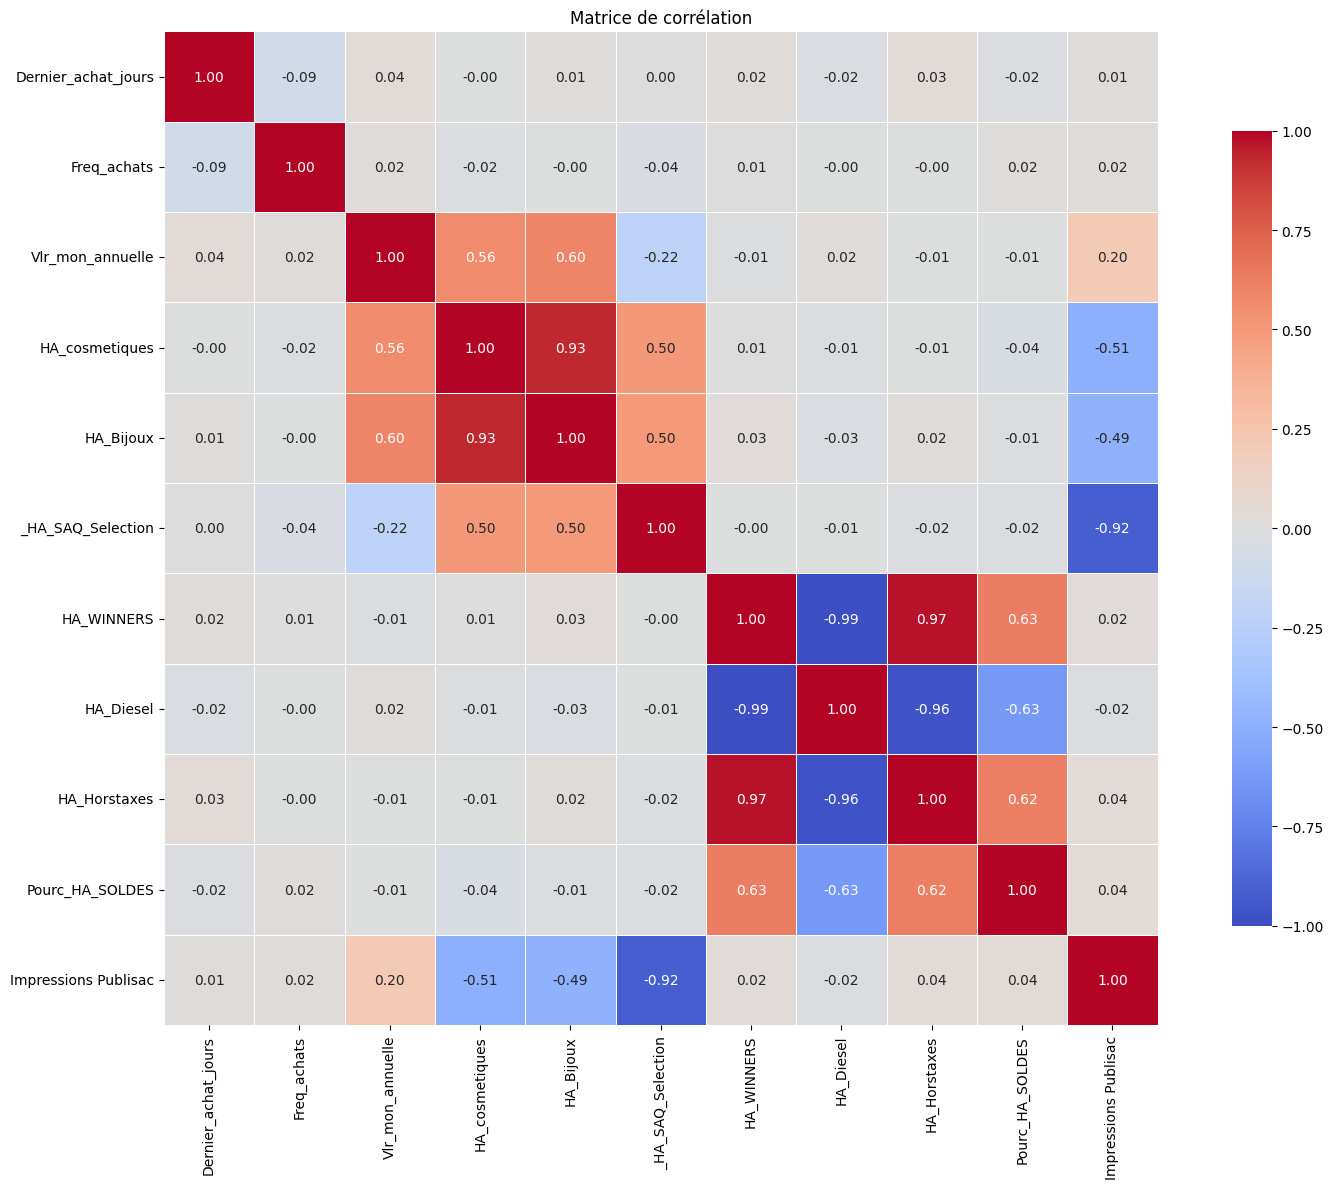


CORRÉLATIONS SIGNIFICATIVES (p-value < 0.05)
--------------------------------------------------------------------------------
       Variable 1           Variable 2  Corrélation   P-value
       HA_WINNERS            HA_Diesel       -0.991 1.20e-292
       HA_WINNERS         HA_Horstaxes        0.971 1.74e-208
        HA_Diesel         HA_Horstaxes       -0.964 5.53e-194
   HA_cosmetiques            HA_Bijoux        0.935 1.75e-151
_HA_SAQ_Selection Impressions Publisac       -0.915 4.63e-133
        HA_Diesel      Pourc_HA_SOLDES       -0.631  1.51e-38
       HA_WINNERS      Pourc_HA_SOLDES        0.630  2.29e-38
     HA_Horstaxes      Pourc_HA_SOLDES        0.618  1.66e-36
 Vlr_mon_annuelle            HA_Bijoux        0.596  1.50e-33
 Vlr_mon_annuelle       HA_cosmetiques        0.565  1.62e-29
   HA_cosmetiques Impressions Publisac       -0.506  4.50e-23
   HA_cosmetiques    _HA_SAQ_Selection        0.501  1.21e-22
        HA_Bijoux    _HA_SAQ_Selection        0.497  2.78e-22
     

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Configuration de la figure pour le heatmap
plt.figure(figsize=(16, 12))

# Sélectionner les colonnes numériques pertinentes
colonnes_correlation = [
    "Dernier_achat_jours",
    "Freq_achats",
    "Vlr_mon_annuelle",
    "HA_cosmetiques",
    "HA_Bijoux",
    "_HA_SAQ_Selection",
    "HA_WINNERS",
    "HA_Diesel",
    "HA_Horstaxes",
    "Pourc_HA_SOLDES",
    "Impressions Publisac",
]

# Calculer la matrice de corrélation
matrice_correlation = df[colonnes_correlation].corr()

# Création du heatmap
sns.heatmap(
    matrice_correlation,
    annot=True,
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    fmt=".2f",
)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

# Création d'une liste pour stocker les corrélations significatives
correlations_significatives = []

# Calcul des corrélations et p-values
for i, col1 in enumerate(colonnes_correlation):
    for j, col2 in enumerate(colonnes_correlation):
        if i < j:  # Pour éviter les doublons et la diagonale
            correlation, p_value = stats.pearsonr(df[col1], df[col2])
            if p_value < 0.05:  # Seulement les corrélations significatives
                correlations_significatives.append(
                    {
                        "Variable 1": col1,
                        "Variable 2": col2,
                        "Corrélation": round(correlation, 3),
                        "P-value": format(p_value, ".2e"),
                    }
                )

# Création du tableau des corrélations significatives
tableau_correlations = pd.DataFrame(correlations_significatives)
tableau_correlations = tableau_correlations.sort_values(
    "Corrélation", key=abs, ascending=False
)

print("\nCORRÉLATIONS SIGNIFICATIVES (p-value < 0.05)")
print("-" * 80)
print(tableau_correlations.to_string(index=False))

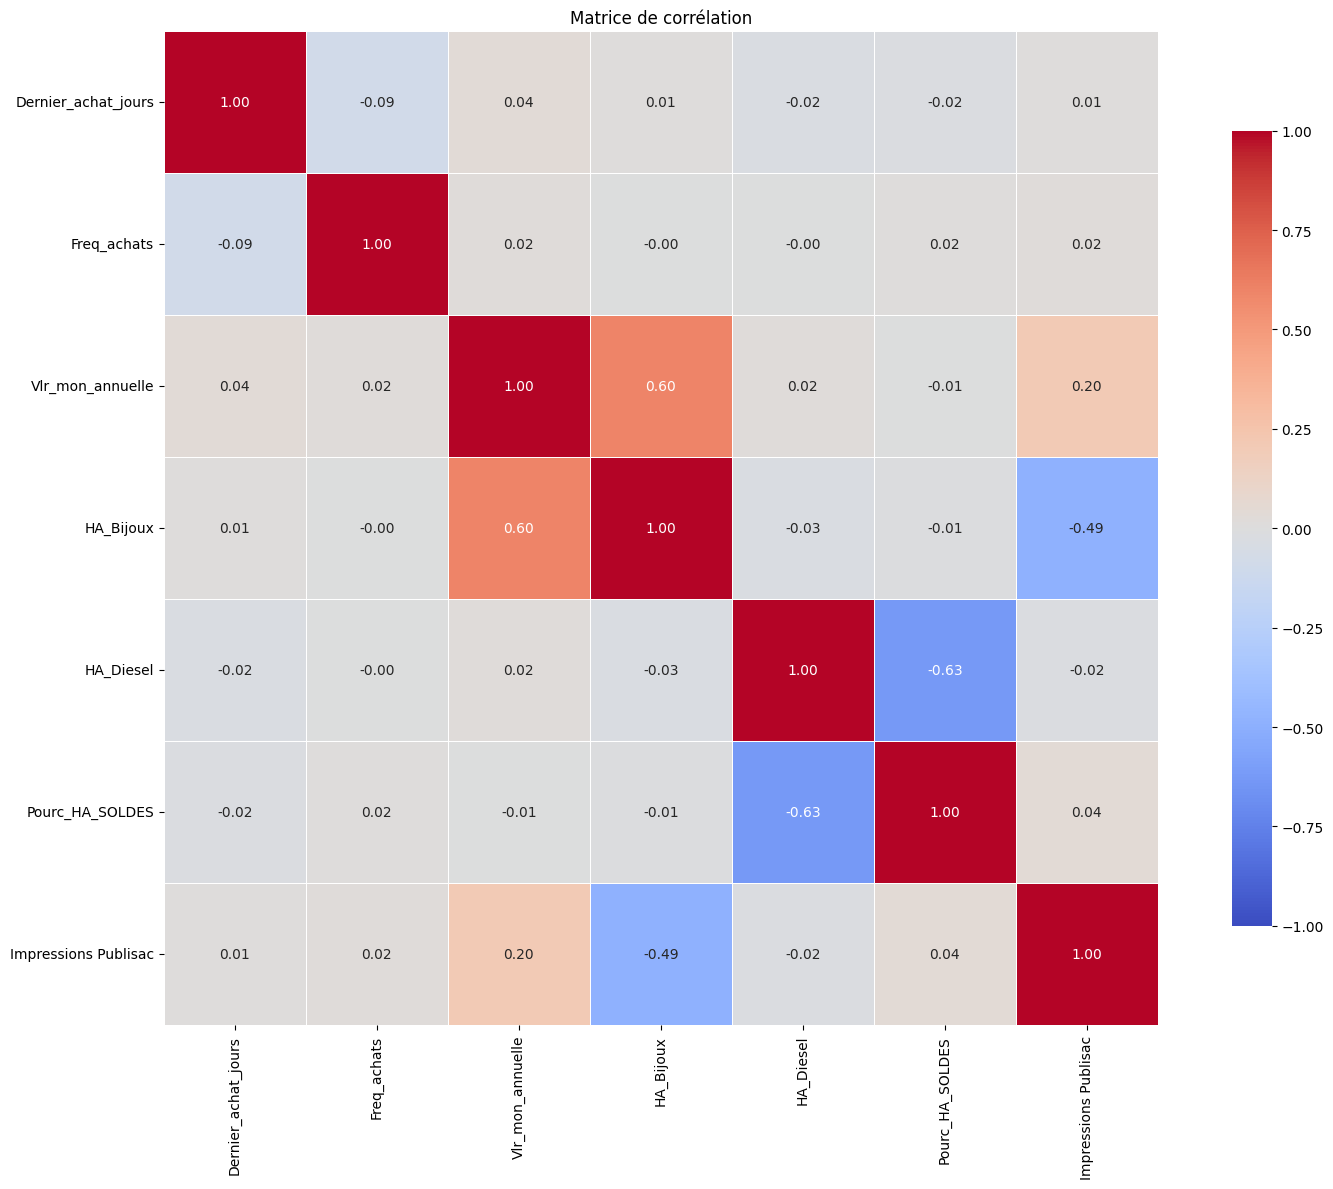


CORRÉLATIONS SIGNIFICATIVES (p-value < 0.05)
--------------------------------------------------------------------------------
      Variable 1           Variable 2  Corrélation  P-value
       HA_Diesel      Pourc_HA_SOLDES       -0.631 1.51e-38
Vlr_mon_annuelle            HA_Bijoux        0.596 1.50e-33
       HA_Bijoux Impressions Publisac       -0.490 1.50e-21
Vlr_mon_annuelle Impressions Publisac        0.204 1.76e-04


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Configuration de la figure pour le heatmap
plt.figure(figsize=(16, 12))

# Sélectionner les colonnes numériques pertinentes
# on enlève : HA_WINNERS, HA_cosmetiques, HA_Horstaxes et _HA_SAQ_Selection
colonnes_correlation = [
    "Dernier_achat_jours",
    "Freq_achats",
    "Vlr_mon_annuelle",
    "HA_Bijoux",
    "HA_Diesel",
    "Pourc_HA_SOLDES",
    "Impressions Publisac",
]

# Calculer la matrice de corrélation
matrice_correlation = df[colonnes_correlation].corr()

# Création du heatmap
sns.heatmap(
    matrice_correlation,
    annot=True,
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    fmt=".2f",
)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

# Création d'une liste pour stocker les corrélations significatives
correlations_significatives = []

# Calcul des corrélations et p-values
for i, col1 in enumerate(colonnes_correlation):
    for j, col2 in enumerate(colonnes_correlation):
        if i < j:  # Pour éviter les doublons et la diagonale
            correlation, p_value = stats.pearsonr(df[col1], df[col2])
            if p_value < 0.05:  # Seulement les corrélations significatives
                correlations_significatives.append(
                    {
                        "Variable 1": col1,
                        "Variable 2": col2,
                        "Corrélation": round(correlation, 3),
                        "P-value": format(p_value, ".2e"),
                    }
                )

# Création du tableau des corrélations significatives
tableau_correlations = pd.DataFrame(correlations_significatives)
tableau_correlations = tableau_correlations.sort_values(
    "Corrélation", key=abs, ascending=False
)

print("\nCORRÉLATIONS SIGNIFICATIVES (p-value < 0.05)")
print("-" * 80)
print(tableau_correlations.to_string(index=False))

### 03.5 Comment enrichir la création des variables?

#### [À lire]

##### Poids relatif de chaque critère: Ces coefficients déterminent l'importance relative de chaque critère dans le calcul du score final. Dans notre exemple :

1. 0.2 pour la récence: Cela signifie que la date du dernier achat représente 20% du score total. Un client ayant acheté récemment aura un score plus élevé pour ce critère. <br>
2. 0.5 pour la fréquence: La fréquence d'achat représente 50% du score. Les clients qui achètent souvent auront un score plus élevé.<br>
3. 0.3 pour le montant: Le montant total dépensé représente 30% du score. Les clients qui dépensent plus auront un score plus élevé.<br>

##### Réflexion stratégique: Le choix de ces coefficients est souvent basé sur une réflexion stratégique et sur la connaissance du secteur d'activité. Par exemple :

Si la fidélisation des clients est une priorité, on peut accorder plus de poids à la fréquence.
Si la rentabilité est l'objectif principal, on peut accorder plus de poids au montant.
Si l'on souhaite attirer de nouveaux clients, on peut accorder plus de poids à la récence.
Pourquoi ne pas utiliser des coefficients égaux ?
En attribuant des coefficients égaux, tous les critères auraient le même poids dans le calcul du score. Or, en fonction de vos objectifs et de la nature de votre activité, certains critères peuvent être plus importants que d'autres.

##### Comment choisir les bons coefficients ?
Il n'y a pas de formule magique pour choisir les coefficients idéaux. Cela dépend de nombreux facteurs, notamment :

Les objectifs de votre entreprise: Que souhaitez-vous atteindre avec cette segmentation ?
La nature de vos produits ou services: Sont-ils plutôt axés sur la fidélisation ou sur l'acquisition ?
Le comportement de vos clients: Quels sont les critères qui influencent le plus leurs décisions d'achat ?

##### Objectifs de la segmentation:

Clarifier les objectifs: Il est essentiel de définir clairement les objectifs de votre segmentation. Si vous cherchez à identifier les clients les
plus fidèles et à les fidéliser davantage, la méthode RFM est souvent suffisante. 
Si vous souhaitez personnaliser les offres en fonction des préférences produits, l'ajout de variables liées aux produits peut être pertinent.

#### [Voici deux exemples]

In [16]:
# Création d'un DataFrame fictif
data = {
    "Dernier_achat_jours": [30, 90, 10, 180, 5],
    "Freq_achats": [5, 2, 10, 1, 8],
    "Vlr_mon_annuelle": [1000, 500, 2000, 300, 1500],
}
df = pd.DataFrame(data)

# Création d'un score de fidélité simple
df["Score_fidelite"] = (
    df["Dernier_achat_jours"] * 0.2
    + df["Freq_achats"] * 0.5
    + df["Vlr_mon_annuelle"] * 0.3
)

print(df)

   Dernier_achat_jours  Freq_achats  Vlr_mon_annuelle  Score_fidelite
0                   30            5              1000           308.5
1                   90            2               500           169.0
2                   10           10              2000           607.0
3                  180            1               300           126.5
4                    5            8              1500           455.0


In [17]:
# Variables dérivées pour enrichir l'analyse
df = pd.read_csv("./chiboub-Données_cas_JV_AMEX.csv", sep=";")
# A. Variable de Segmentation Client
df["Segment_Client"] = pd.cut(
    df["Vlr_mon_annuelle"],
    bins=[0, 500, 1500, 5000, np.inf],
    labels=["Basic", "Standard", "Premium", "VIP"],
)

# B. Ratio Promotionnel
df["Ratio_Promotions"] = df["Pourc_HA_SOLDES"] / 100

# C. Score de Fidélité Multicanal
colonnes_achats = [
    "HA_cosmetiques",
    "HA_Bijoux",
    "_HA_SAQ_Selection",
    "HA_WINNERS",
    "HA_Diesel",
]
df["Score_Diversite_Achats"] = df[colonnes_achats].apply(
    lambda x: (x > 0).sum(), axis=1
)

# D. Variable de Récence
df["Recence_Categorie"] = pd.cut(
    df["Dernier_achat_jours"],
    bins=[0, 30, 90, 180, 365, np.inf],
    labels=["Très Récent", "Récent", "Moyen", "Ancien", "Inactif"],
)

# E. Montant moyen par achat
df["Montant_Moyen_Achat"] = df["Vlr_mon_annuelle"] / df["Freq_achats"]

In [18]:
df.head()

,ID,Dernier_achat_jours,Freq_achats,Vlr_mon_annuelle,HA_cosmetiques,HA_Bijoux,_HA_SAQ_Selection,Impressions Publisac,HA_WINNERS,HA_Diesel,HA_Horstaxes,Pourc_HA_SOLDES,Segment_Client,Ratio_Promotions,Score_Diversite_Achats,Recence_Categorie,Montant_Moyen_Achat
0,102203,174,4,151,17,26,36,42,60,1627,123,0,Basic,0.00,5,Moyen,37.750000
1,106024,174,3,31,1,0,48,44,69,1554,95,29,Basic,0.29,4,Moyen,10.333333
2,108442,314,2,170,62,260,172,0,65,1678,85,29,Basic,0.29,5,Ancien,85.000000
3,108559,98,3,40,11,21,42,26,903,75,289,20,Basic,0.20,5,Moyen,13.333333
4,109747,153,5,89,37,161,196,0,60,1507,90,0,Basic,0.00,5,Moyen,17.800000


<a id='cluster'></a>
## 04. Clustering

In [19]:
# On importe la BD encore
df = pd.read_csv("./chiboub-Données_cas_JV_AMEX.csv", sep=";")

In [20]:
df.head()

,ID,Dernier_achat_jours,Freq_achats,Vlr_mon_annuelle,HA_cosmetiques,HA_Bijoux,_HA_SAQ_Selection,Impressions Publisac,HA_WINNERS,HA_Diesel,HA_Horstaxes,Pourc_HA_SOLDES
0,102203,174,4,151,17,26,36,42,60,1627,123,0
1,106024,174,3,31,1,0,48,44,69,1554,95,29
2,108442,314,2,170,62,260,172,0,65,1678,85,29
3,108559,98,3,40,11,21,42,26,903,75,289,20
4,109747,153,5,89,37,161,196,0,60,1507,90,0


In [21]:
# On standarize les variables pas corrélées
colonnes_sans_correlation = [
    "Dernier_achat_jours",
    "Freq_achats",
    "Vlr_mon_annuelle",
    "HA_Bijoux",
    "HA_Diesel",
    "Pourc_HA_SOLDES",
    "Impressions Publisac",
]
scaler = StandardScaler()
# X = df.loc[:, df.columns != 'ID'].values
X = df[colonnes_sans_correlation].values
X = scaler.fit(X).transform(X)
Y = df["ID"].values

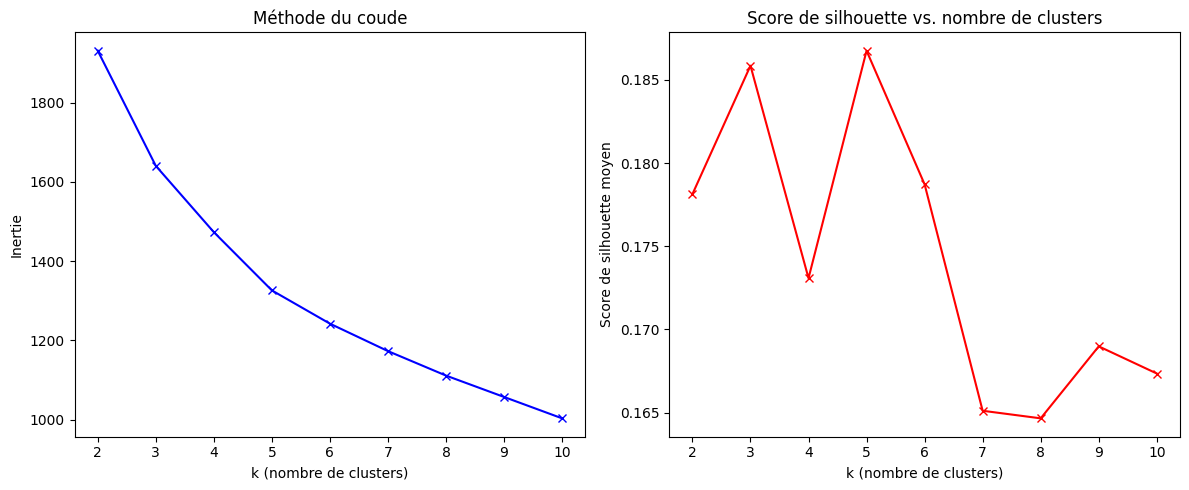

In [22]:
# Méthode du coude (Elbow method)
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    # Création du modèle
    clustering = AgglomerativeClustering(n_clusters=k, linkage="ward")
    # Fit du modèle
    clustering.fit(X)
    # Calcul de l'inertie
    labels = clustering.labels_

    # Calcul du score de silhouette
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

    # Calcul de l'inertie (somme des carrés des distances)
    centroid = []
    for label in range(k):
        mask = labels == label
        centroid.append(X[mask].mean(axis=0))

    inertia = 0
    for i, label in enumerate(labels):
        inertia += np.sum((X[i] - centroid[label]) ** 2)

    inertias.append(inertia)

# Visualisation de la méthode du coude
plt.figure(figsize=(12, 5))

# Premier subplot pour l'inertie
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, "bx-")
plt.xlabel("k (nombre de clusters)")
plt.ylabel("Inertie")
plt.title("Méthode du coude")

# Deuxième subplot pour le score de silhouette
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, "rx-")
plt.xlabel("k (nombre de clusters)")
plt.ylabel("Score de silhouette moyen")
plt.title("Score de silhouette vs. nombre de clusters")

plt.tight_layout()
plt.show()

In [23]:
# K-means clustering (non-hierarchical) avec 5 clusters
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=50, random_state=42)
customer_clusters = pd.DataFrame({"ID": Y, "cluster": kmeans.fit_predict(X)})

In [24]:
customer_clusters.head()

,ID,cluster
0,102203,0
1,106024,0
2,108442,2
3,108559,1
4,109747,2


In [25]:
# Distribution de la population par cluster
customer_clusters.groupby("cluster").count()
customer_clusters["cluster"].value_counts(normalize=True).round(2)

cluster
1    0.24
0    0.23
2    0.19
4    0.19
3    0.15
Name: proportion, dtype: float64

In [26]:
# save the model
# filename= 'Clustering_JV_AMEX.sav'
# pickle.dump(kmeans, open(filename, 'wb'))

In [27]:
# Joindre les clusters au dataframe original en utilisant pd.merge
df_with_clusters = pd.merge(df, customer_clusters, on="ID", how="left")

# Définir les colonnes pour le résumé
cols_summary = [
    "Freq_achats",
    "HA_Bijoux",
    "HA_Diesel",
    "Dernier_achat_jours",
    "Impressions Publisac",
    "Pourc_HA_SOLDES",
    "Vlr_mon_annuelle",
    "HA_cosmetiques",
    "_HA_SAQ_Selection",
    "HA_WINNERS",
    "HA_Horstaxes",
]

# Créer le résumé par cluster
cluster_summary = df_with_clusters.groupby("cluster")[cols_summary].mean().round(2)

# Ajouter le compte des clients par cluster
cluster_size = df_with_clusters["cluster"].value_counts().sort_index()
cluster_summary.insert(0, "Nombre_Clients", cluster_size)

# Renommer les colonnes pour plus de clarté
cluster_summary.columns = [
    "Nombre_Clients",
    "Freq_Achats",
    "Achats_Bijoux",
    "Achats_Diesel",
    "Dernier_Achat_Jours",
    "Impressions_Publisac",
    "Pourcentage_Soldes",
    "Valeur_Monetaire",
    "Achats_Cosmetiques",
    "Achats_SAQ_Selection",
    "Achats_Winners",
    "Achats_Horstaxes",
]

# Vérifier que le merge s'est bien passé
print("Nombre total de clients:", len(df_with_clusters))
print("Nombre de clients sans cluster:", df_with_clusters["cluster"].isna().sum())

Nombre total de clients: 334
Nombre de clients sans cluster: 0


In [28]:
cluster_summary

,Nombre_Clients,Freq_Achats,Achats_Bijoux,Achats_Diesel,Dernier_Achat_Jours,Impressions_Publisac,Pourcentage_Soldes,Valeur_Monetaire,Achats_Cosmetiques,Achats_SAQ_Selection,Achats_Winners,Achats_Horstaxes
cluster,,,,,,,,,,,,
0,78,3.03,105.58,1563.33,182.64,40.03,14.60,210.97,20.95,46.69,74.10,111.65
1,81,3.02,77.65,90.94,182.91,40.89,50.07,159.62,15.09,46.65,889.90,296.32
2,64,2.94,118.27,1576.92,164.05,3.36,10.55,68.77,26.62,170.47,61.17,103.11
3,49,3.02,474.43,884.00,180.39,0.94,22.90,258.55,87.20,177.53,448.49,198.67
4,62,2.92,192.35,84.82,196.27,0.48,54.19,111.42,36.79,182.37,884.16,292.35


In [29]:
# Export en format .csv
# cluster_summary.to_csv('./sommaire_cluster_JV_AMEX.csv')

In [30]:
# Fonction optionnelle pour statistiques détaillées par cluster
def print_cluster_stats(cluster_num):
    cluster_data = df_with_clusters[df_with_clusters["cluster"] == cluster_num]
    print(f"\nSTATISTIQUES DÉTAILLÉES - CLUSTER {cluster_num}")
    print("-" * 50)
    print(f"Nombre de clients: {len(cluster_data)}")
    print("\nStatistiques principales:")
    print(cluster_data[cols_summary].describe().round(2))

In [31]:
print_cluster_stats(0)


STATISTIQUES DÉTAILLÉES - CLUSTER 0
--------------------------------------------------
Nombre de clients: 78

Statistiques principales:
       Freq_achats  HA_Bijoux  HA_Diesel  Dernier_achat_jours  Impressions Publisac  Pourc_HA_SOLDES  Vlr_mon_annuelle  HA_cosmetiques  _HA_SAQ_Selection  HA_WINNERS  HA_Horstaxes
count        78.00      78.00      78.00                78.00                 78.00            78.00             78.00           78.00              78.00       78.00         78.00
mean          3.03     105.58    1563.33               182.64                 40.03            14.60            210.97           20.95              46.69       74.10        111.65
std           1.02      53.69     238.40               104.83                 10.13            16.49             83.17           13.02              15.00      138.14         37.32
min           0.00       0.00     166.00                 3.00                 10.00             0.00             31.00            0.00         

## Annexe: Pour aller plus loin

In [39]:
# Joindre les clusters au dataframe original
df_with_clusters = pd.merge(df, customer_clusters, on="ID", how="left")

# Définir les colonnes pour le résumé
cols_summary = [
    "Freq_achats",
    "HA_Bijoux",
    "HA_Diesel",
    "Dernier_achat_jours",
    "Impressions Publisac",
    "Pourc_HA_SOLDES",
    "Vlr_mon_annuelle",
    "HA_cosmetiques",
    "_HA_SAQ_Selection",
    "HA_WINNERS",
    "HA_Horstaxes",
]

# Calculer les moyennes par cluster
cluster_means = df_with_clusters.groupby("cluster")[cols_summary].mean().round(2)
cluster_sizes = df_with_clusters["cluster"].value_counts().sort_index()


# Fonction pour formater la sortie
def print_formatted_summary():
    print("\nRÉSUMÉ DES CLUSTERS")
    print("=" * 80)

    for cluster in sorted(df_with_clusters["cluster"].unique()):
        print(f"\nCLUSTER {cluster} (Nombre de clients: {cluster_sizes[cluster]})")
        print("-" * 80)

        # Créer un dictionnaire des moyennes pour ce cluster
        means = cluster_means.loc[cluster]

        # Formater chaque métrique
        print(f"Fréquence d'achats             : {means['Freq_achats']:>8.2f}")
        print(f"Achats Bijoux                  : {means['HA_Bijoux']:>8.2f}")
        print(f"Achats Diesel                  : {means['HA_Diesel']:>8.2f}")
        print(f"Dernier achat (jours)          : {means['Dernier_achat_jours']:>8.2f}")
        print(f"Impressions Publisac           : {means['Impressions Publisac']:>8.2f}")
        print(f"Pourcentage achats en solde    : {means['Pourc_HA_SOLDES']:>8.2f}")
        print(f"Valeur monétaire annuelle      : {means['Vlr_mon_annuelle']:>8.2f}")
        print(f"Achats Cosmétiques             : {means['HA_cosmetiques']:>8.2f}")
        print(f"Achats SAQ Sélection           : {means['_HA_SAQ_Selection']:>8.2f}")
        print(f"Achats WINNERS                 : {means['HA_WINNERS']:>8.2f}")
        print(f"Achats Hors-taxes              : {means['HA_Horstaxes']:>8.2f}")


# Afficher le résumé formaté
print_formatted_summary()


# Fonction optionnelle pour exporter en Excel si nécessaire
def export_to_excel(filename="cluster_summary.xlsx"):
    writer = pd.ExcelWriter(filename, engine="xlsxwriter")

    # Ajouter le nombre de clients
    summary_df = cluster_means.copy()
    summary_df.insert(0, "Nombre_Clients", cluster_sizes)

    summary_df.to_excel(writer, sheet_name="Résumé Clusters")
    writer.save()
    print(f"\nRésumé exporté vers {filename}")


# Décommenter pour exporter en Excel
# export_to_excel()


RÉSUMÉ DES CLUSTERS

CLUSTER 0 (Nombre de clients: 78)
--------------------------------------------------------------------------------
Fréquence d'achats             :     3.03
Achats Bijoux                  :   105.58
Achats Diesel                  :  1563.33
Dernier achat (jours)          :   182.64
Impressions Publisac           :    40.03
Pourcentage achats en solde    :    14.60
Valeur monétaire annuelle      :   210.97
Achats Cosmétiques             :    20.95
Achats SAQ Sélection           :    46.69
Achats WINNERS                 :    74.10
Achats Hors-taxes              :   111.65

CLUSTER 1 (Nombre de clients: 81)
--------------------------------------------------------------------------------
Fréquence d'achats             :     3.02
Achats Bijoux                  :    77.65
Achats Diesel                  :    90.94
Dernier achat (jours)          :   182.91
Impressions Publisac           :    40.89
Pourcentage achats en solde    :    50.07
Valeur monétaire annuelle      : 